In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import scipy.stats as stats
from scipy.stats import poisson

In [15]:
import pandas as pd
#Read the dataset
df = pd.read_excel(r'GSE46579.xls')
df

,Unnamed: 0,AD,AD.1,AD.2,AD.3,AD.4,AD.5,AD.6,AD.7,AD.8,...,AD.38,AD.39,AD.40,AD.41,AD.42,AD.43,AD.44,AD.45,AD.46,AD.47
0,hsa-mir-30a:hsa-miR-30a-3p,115,156,193,123,89,50,118,213,101,...,70,215,550,315,11,78,133,147,63,6
1,hsa-mir-550a-1:hsa-miR-550a-3p,241,931,415,355,576,198,506,522,297,...,220,565,1655,1537,31,241,245,476,137,10
2,hsa-mir-29a:hsa-miR-29a-3p,29,91,42,39,45,17,19,52,30,...,79,85,670,432,5,30,74,49,10,0
3,hsa-mir-378e:hsa-miR-378e,1,2,2,0,0,1,0,0,3,...,0,0,24,9,0,1,9,1,0,0
4,hsa-mir-155:hsa-miR-155-5p,21,19,16,33,18,19,17,16,24,...,33,18,190,72,5,22,46,19,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,brain-mir-167:brain-mir-167,3,4,2,4,2,4,2,2,0,...,1,1,15,11,0,1,1,1,0,0
499,brain-mir-24:brain-mir-24,15,23,22,23,28,4,28,12,8,...,0,5,58,35,5,2,6,40,29,0
500,brain-mir-159:brain-mir-159,228,373,215,163,219,110,240,208,129,...,70,105,835,761,30,104,123,279,128,15
501,brain-mir-328:brain-mir-328,7,9,11,11,11,4,7,9,10,...,7,13,36,28,0,11,11,11,6,1


In [16]:
features = []

In [17]:
fea = df['Unnamed: 0']
fea

0          hsa-mir-30a:hsa-miR-30a-3p
1      hsa-mir-550a-1:hsa-miR-550a-3p
2          hsa-mir-29a:hsa-miR-29a-3p
3           hsa-mir-378e:hsa-miR-378e
4          hsa-mir-155:hsa-miR-155-5p
                    ...              
498       brain-mir-167:brain-mir-167
499         brain-mir-24:brain-mir-24
500       brain-mir-159:brain-mir-159
501       brain-mir-328:brain-mir-328
502       brain-mir-225:brain-mir-225
Name: Unnamed: 0, Length: 503, dtype: object

In [18]:
#Put the feature names into an array
for i in range(0,503):
    features.append(fea[i])
features

['hsa-mir-30a:hsa-miR-30a-3p',
 'hsa-mir-550a-1:hsa-miR-550a-3p',
 'hsa-mir-29a:hsa-miR-29a-3p',
 'hsa-mir-378e:hsa-miR-378e',
 'hsa-mir-155:hsa-miR-155-5p',
 'hsa-mir-628:hsa-miR-628-3p',
 'hsa-mir-26a-2:hsa-miR-26a-5p',
 'hsa-mir-106b:hsa-miR-106b-5p',
 'hsa-mir-4781:hsa-miR-4781-3p',
 'hsa-mir-204:hsa-miR-204-5p',
 'hsa-mir-194-1:hsa-miR-194-5p',
 'hsa-mir-320c-1:hsa-miR-320c',
 'hsa-mir-10b:hsa-miR-10b-5p',
 'hsa-mir-1260a:hsa-miR-1260a',
 'hsa-mir-215:hsa-miR-215',
 'hsa-mir-548aj-2:hsa-miR-548g-5p',
 'hsa-mir-193a:hsa-miR-193a-5p',
 'hsa-mir-4732:hsa-miR-4732-3p',
 'hsa-mir-3613:hsa-miR-3613-3p',
 'hsa-mir-1226:hsa-miR-1226-3p',
 'hsa-mir-7-3:hsa-miR-7-5p',
 'hsa-mir-1303:hsa-miR-1303',
 'hsa-mir-183:hsa-miR-183-3p',
 'hsa-mir-5100:hsa-miR-5100',
 'hsa-mir-196a-1:hsa-miR-196a-5p',
 'hsa-mir-181a-1:hsa-miR-181a-3p',
 'hsa-mir-548x:hsa-miR-548ar-5p',
 'hsa-mir-548k:hsa-miR-548av-5p',
 'hsa-mir-199a-1:hsa-miR-199a-3p',
 'hsa-mir-486:hsa-miR-486-5p',
 'hsa-mir-4448:hsa-miR-4448',
 'h

In [19]:
df

,Unnamed: 0,AD,AD.1,AD.2,AD.3,AD.4,AD.5,AD.6,AD.7,AD.8,...,AD.38,AD.39,AD.40,AD.41,AD.42,AD.43,AD.44,AD.45,AD.46,AD.47
0,hsa-mir-30a:hsa-miR-30a-3p,115,156,193,123,89,50,118,213,101,...,70,215,550,315,11,78,133,147,63,6
1,hsa-mir-550a-1:hsa-miR-550a-3p,241,931,415,355,576,198,506,522,297,...,220,565,1655,1537,31,241,245,476,137,10
2,hsa-mir-29a:hsa-miR-29a-3p,29,91,42,39,45,17,19,52,30,...,79,85,670,432,5,30,74,49,10,0
3,hsa-mir-378e:hsa-miR-378e,1,2,2,0,0,1,0,0,3,...,0,0,24,9,0,1,9,1,0,0
4,hsa-mir-155:hsa-miR-155-5p,21,19,16,33,18,19,17,16,24,...,33,18,190,72,5,22,46,19,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,brain-mir-167:brain-mir-167,3,4,2,4,2,4,2,2,0,...,1,1,15,11,0,1,1,1,0,0
499,brain-mir-24:brain-mir-24,15,23,22,23,28,4,28,12,8,...,0,5,58,35,5,2,6,40,29,0
500,brain-mir-159:brain-mir-159,228,373,215,163,219,110,240,208,129,...,70,105,835,761,30,104,123,279,128,15
501,brain-mir-328:brain-mir-328,7,9,11,11,11,4,7,9,10,...,7,13,36,28,0,11,11,11,6,1


In [21]:
#Remove the column which includes feature names from the dataframe
df = df.select_dtypes(include=[np.number])
df

,AD,AD.1,AD.2,AD.3,AD.4,AD.5,AD.6,AD.7,AD.8,AD.9,...,AD.38,AD.39,AD.40,AD.41,AD.42,AD.43,AD.44,AD.45,AD.46,AD.47
0,115,156,193,123,89,50,118,213,101,116,...,70,215,550,315,11,78,133,147,63,6
1,241,931,415,355,576,198,506,522,297,337,...,220,565,1655,1537,31,241,245,476,137,10
2,29,91,42,39,45,17,19,52,30,42,...,79,85,670,432,5,30,74,49,10,0
3,1,2,2,0,0,1,0,0,3,0,...,0,0,24,9,0,1,9,1,0,0
4,21,19,16,33,18,19,17,16,24,49,...,33,18,190,72,5,22,46,19,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,3,4,2,4,2,4,2,2,0,2,...,1,1,15,11,0,1,1,1,0,0
499,15,23,22,23,28,4,28,12,8,10,...,0,5,58,35,5,2,6,40,29,0
500,228,373,215,163,219,110,240,208,129,158,...,70,105,835,761,30,104,123,279,128,15
501,7,9,11,11,11,4,7,9,10,5,...,7,13,36,28,0,11,11,11,6,1


### Quantile Normalization

In [12]:
def quantileNormalize(df_input):
    df = df_input.copy()
    #compute rank
    dic = {}
    for col in df:
        dic.update({col : sorted(df[col])})
    sorted_df = pd.DataFrame(dic)
    rank = sorted_df.mean(axis = 1).tolist()
    #sort
    for col in df:
        t = np.searchsorted(np.sort(df[col]), df[col])
        df[col] = [rank[i] for i in t]
    return(df)


df_qn=quantileNormalize(df)
df_qn

,AD,AD.1,AD.2,AD.3,AD.4,AD.5,AD.6,AD.7,AD.8,AD.9,...,AD.38,AD.39,AD.40,AD.41,AD.42,AD.43,AD.44,AD.45,AD.46,AD.47
0,172.300000,132.885714,282.371429,179.371429,115.700000,89.857143,183.542857,317.385714,102.557143,207.271429,...,122.957143,275.814286,98.228571,64.457143,117.857143,106.742857,117.857143,175.642857,157.785714,214.900000
1,454.614286,958.457143,794.542857,541.785714,1011.342857,429.757143,958.457143,1055.000000,317.385714,657.428571,...,422.242857,771.614286,328.071429,349.342857,304.814286,339.700000,207.271429,481.685714,349.342857,304.814286
2,41.100000,78.957143,64.457143,69.814286,65.542857,32.228571,29.200000,83.414286,36.985714,70.928571,...,135.714286,141.985714,119.985714,94.542857,46.071429,48.514286,66.700000,59.871429,26.000000,0.000000
3,1.300000,1.100000,2.671429,0.000000,0.000000,1.357143,0.000000,0.000000,2.500000,0.000000,...,0.000000,0.000000,3.542857,1.814286,0.000000,1.585714,6.685714,1.014286,0.000000,0.000000
4,30.157143,15.585714,18.914286,57.842857,20.942857,37.728571,26.814286,21.628571,29.685714,78.957143,...,54.371429,25.157143,32.728571,16.985714,46.071429,32.228571,48.514286,17.871429,37.728571,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,3.714286,2.571429,2.671429,6.942857,2.671429,6.457143,2.271429,2.500000,0.000000,3.385714,...,1.585714,2.771429,1.485714,2.200000,0.000000,1.585714,0.471429,1.014286,0.000000,0.000000
499,24.185714,18.742857,27.728571,36.400000,38.485714,6.457143,47.171429,18.057143,7.528571,16.671429,...,0.000000,7.528571,8.857143,8.771429,46.071429,2.728571,4.471429,46.071429,67.857143,0.000000
500,429.757143,310.414286,297.985714,275.814286,275.814286,187.242857,411.357143,310.414286,126.214286,256.671429,...,122.957143,165.114286,145.442857,161.114286,282.371429,157.785714,100.871429,250.485714,297.985714,584.742857
501,10.257143,7.285714,16.371429,16.185714,14.757143,6.457143,10.600000,13.571429,9.842857,7.414286,...,11.400000,18.057143,5.600000,7.528571,0.000000,18.914286,9.642857,11.400000,16.514286,24.885714


#### Density Plot After Quantile Normalization

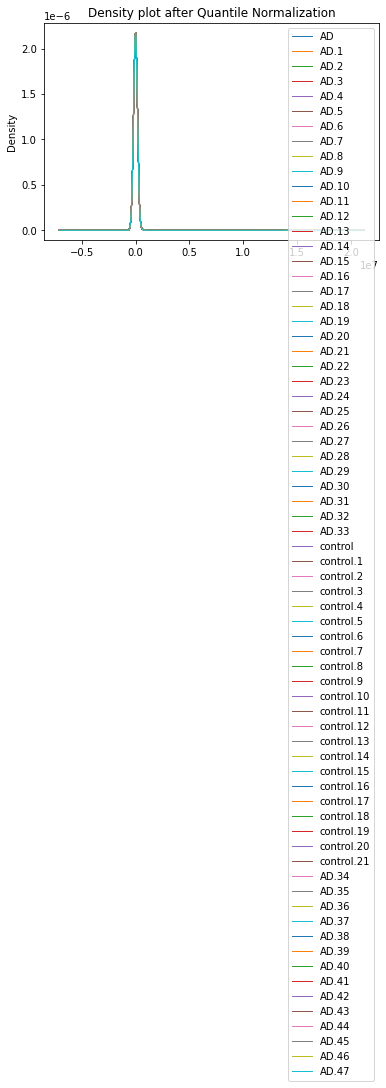

In [22]:
df_qn.plot.density(linewidth=1)
plt.title("Density plot after Quantile Normalization")
plt.savefig('Density_plot_after_Quantile_Normalization_Pandas.png',dpi=150)

In [23]:
#Add the class column to the dataframe
for col in df_qn.columns:
    if 'AD' in col:
          df_qn.loc['class',col] = 1 
    else:
          df_qn.loc['class',col] = 0

In [24]:
#Transpose of the dataframe
df_transposed=df_qn.T
df_transposed=df_transposed.iloc[1:]
df_transposed

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,500,501,502,class
AD.1,132.885714,958.457143,78.957143,1.100000,15.585714,0.000000,3546.471429,117.857143,21.828571,2.571429,...,4.914286,2.571429,41.100000,13.571429,2.571429,18.742857,310.414286,7.285714,5.442857,1.0
AD.2,282.371429,794.542857,64.457143,2.671429,18.914286,1.542857,14464.157143,40.428571,35.728571,10.485714,...,7.414286,7.414286,54.371429,18.285714,2.671429,27.728571,297.985714,16.371429,1.542857,1.0
AD.3,179.371429,541.785714,69.814286,0.000000,57.842857,2.800000,8648.271429,18.542857,23.057143,8.157143,...,0.000000,11.400000,29.200000,14.871429,6.942857,36.400000,275.814286,16.185714,2.800000,1.0
AD.4,115.700000,1011.342857,65.542857,0.000000,20.942857,0.942857,7038.985714,72.342857,31.471429,0.942857,...,2.671429,13.442857,100.871429,19.800000,2.671429,38.485714,275.814286,14.757143,0.942857,1.0
AD.5,89.857143,429.757143,32.228571,1.357143,37.728571,0.000000,4315.285714,84.800000,27.728571,1.357143,...,1.357143,15.428571,59.871429,10.600000,6.457143,6.457143,187.242857,6.457143,5.114286,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AD.43,106.742857,339.700000,48.514286,1.585714,32.228571,2.728571,8317.371429,65.542857,25.671429,5.114286,...,1.585714,19.614286,56.314286,13.342857,1.585714,2.728571,157.785714,18.914286,0.000000,1.0
AD.44,117.857143,207.271429,66.700000,6.685714,48.514286,3.028571,5995.142857,202.771429,24.185714,4.471429,...,0.471429,6.242857,29.685714,4.471429,0.471429,4.471429,100.871429,9.642857,1.785714,1.0
AD.45,175.642857,481.685714,59.871429,1.014286,17.871429,3.285714,8317.371429,47.671429,37.728571,1.014286,...,7.614286,14.871429,73.928571,19.085714,1.014286,46.071429,250.485714,11.400000,1.014286,1.0
AD.46,157.785714,349.342857,26.000000,0.000000,37.728571,16.514286,8317.371429,33.728571,37.728571,10.071429,...,3.714286,7.885714,73.928571,21.828571,0.000000,67.857143,297.985714,16.514286,3.714286,1.0


#### Mean Distribution Of The Dataset

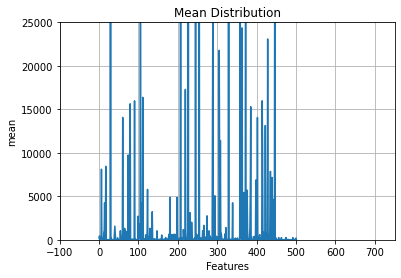

In [28]:
df1 = df_transposed[list(df_transposed.columns[0:502].values)]
plt.xlim([-100,750])
plt.ylim([0,25000])
plt.plot(  df1.columns, df1.mean(axis = 0), label='linear')

plt.xlabel('Features')
plt.ylabel('mean')
plt.title('Mean Distribution')
plt.grid(True)
plt.show()

In [48]:
#Rename the column names from numbers miRNA names
for i in range(0,503):
    df_transposed = df_transposed.rename(columns={i:features[i]})

#### Box Plot 

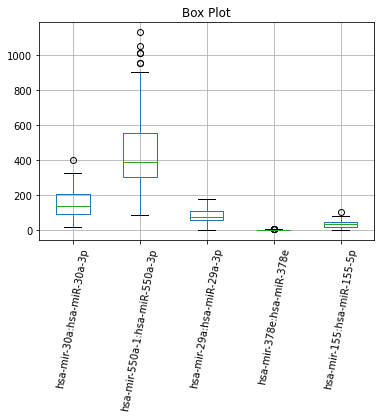

In [49]:
boxplot = df_transposed.boxplot(column=list(df_transposed.columns[0:5].values),rot=80)
boxplot.set_title('Box Plot')
plt.savefig('BoxPlot_Of_5_feaures.png',dpi=150)

### Calculating Accuracy Scores

In [50]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from numpy import mean
from numpy import std

In [51]:
df_tra=df.T
df_tra=df_tra.iloc[1:]

In [52]:
X=df_tra.loc[: , df_tra.columns != 'class']
X

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexes\base.py:122: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,500,501,502
AD.1,156,931,91,2,19,0,5182,140,28,4,...,8,6,4,52,17,4,23,373,9,7
AD.2,193,415,42,2,16,1,8409,31,28,8,...,8,5,5,38,15,2,22,215,11,1
AD.3,123,355,39,0,33,2,7612,13,19,5,...,3,0,7,22,10,4,23,163,11,2
AD.4,89,576,45,0,18,1,5446,50,25,1,...,5,2,10,67,17,2,28,219,11,1
AD.5,50,198,17,1,19,0,2364,47,15,1,...,6,1,9,30,6,4,4,110,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AD.43,78,241,30,1,22,2,4877,41,18,4,...,2,1,12,36,8,1,2,104,11,0
AD.44,133,245,74,9,46,4,7450,232,23,6,...,2,1,8,28,6,1,6,123,11,3
AD.45,147,476,49,1,19,3,7028,41,36,1,...,13,7,15,60,22,1,40,279,11,1
AD.46,63,137,10,0,15,6,3077,13,15,4,...,4,1,3,31,8,0,29,128,6,1


In [53]:
Y=df_transposed.loc[: , df_transposed.columns == 'class']
Y

,class
AD.1,1.0
AD.2,1.0
AD.3,1.0
AD.4,1.0
AD.5,1.0
...,...
AD.43,1.0
AD.44,1.0
AD.45,1.0
AD.46,1.0


In [54]:
from sklearn.model_selection import train_test_split
#Split the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [55]:
#Calculate the accuracy score with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())
y_pred = logreg.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0

In [56]:
#Calculate the accuracy score with KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.5555555555555556

In [57]:
#Calculate the accuracy score with Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8333333333333334

In [58]:
#Calculate the accuracy score with Linear SVM
svm=SVC(kernel='linear')
svm.fit(X_train, y_train.values.ravel())
y_pred = svm.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8888888888888888

In [59]:
#Calculate the accuracy score with rbf SVM
svm = SVC(kernel='rbf', random_state=1, gamma=0.005, C=0.1)
svm.fit(X_train, y_train.values.ravel())
y_pred = svm.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6111111111111112

In [60]:
#Rename the column names from miRNA names to numbers
for i in range(0,503):
    df_transposed = df_transposed.rename(columns={features[i]:i})

In [61]:
df_AD=df_transposed[df_transposed['class'] == 1]
df_AD

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,500,501,502,class
AD.1,132.885714,958.457143,78.957143,1.100000,15.585714,0.000000,3546.471429,117.857143,21.828571,2.571429,...,4.914286,2.571429,41.100000,13.571429,2.571429,18.742857,310.414286,7.285714,5.442857,1.0
AD.2,282.371429,794.542857,64.457143,2.671429,18.914286,1.542857,14464.157143,40.428571,35.728571,10.485714,...,7.414286,7.414286,54.371429,18.285714,2.671429,27.728571,297.985714,16.371429,1.542857,1.0
AD.3,179.371429,541.785714,69.814286,0.000000,57.842857,2.800000,8648.271429,18.542857,23.057143,8.157143,...,0.000000,11.400000,29.200000,14.871429,6.942857,36.400000,275.814286,16.185714,2.800000,1.0
AD.4,115.700000,1011.342857,65.542857,0.000000,20.942857,0.942857,7038.985714,72.342857,31.471429,0.942857,...,2.671429,13.442857,100.871429,19.800000,2.671429,38.485714,275.814286,14.757143,0.942857,1.0
AD.5,89.857143,429.757143,32.228571,1.357143,37.728571,0.000000,4315.285714,84.800000,27.728571,1.357143,...,1.357143,15.428571,59.871429,10.600000,6.457143,6.457143,187.242857,6.457143,5.114286,1.0
AD.6,183.542857,958.457143,29.200000,0.000000,26.814286,0.000000,8317.371429,37.728571,53.242857,6.685714,...,9.200000,18.285714,92.857143,28.257143,2.271429,47.171429,411.357143,10.600000,0.000000,1.0
AD.7,317.385714,1055.000000,83.414286,0.000000,21.628571,0.000000,12957.585714,24.585714,44.385714,3.942857,...,2.500000,10.957143,57.842857,22.685714,2.500000,18.057143,310.414286,13.571429,1.485714,1.0
AD.8,102.557143,317.385714,36.985714,2.500000,29.685714,1.585714,8317.371429,106.742857,32.228571,4.600000,...,0.000000,11.142857,47.171429,9.842857,0.000000,7.528571,126.214286,9.842857,3.357143,1.0
AD.9,207.271429,657.428571,70.928571,0.000000,78.957143,0.000000,9137.385714,64.457143,19.285714,3.385714,...,3.385714,6.385714,60.771429,17.400000,3.385714,16.671429,256.671429,7.414286,1.871429,1.0
AD.10,190.357143,388.457143,119.985714,0.528571,47.171429,13.142857,8648.271429,89.857143,28.571429,1.685714,...,2.400000,10.000000,25.428571,6.242857,1.685714,9.742857,179.371429,8.157143,3.028571,1.0


In [62]:
df_CONTROL=df_transposed[df_transposed['class'] == 0]
df_CONTROL

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,500,501,502,class
control,129.985714,256.671429,155.100000,1.714286,56.314286,14.757143,8648.271429,220.185714,9.128571,1.714286,...,0.000000,6.414286,29.685714,5.042857,0.528571,6.414286,96.385714,6.414286,5.042857,0.0
control.1,214.900000,269.785714,73.928571,1.014286,60.771429,9.742857,8648.271429,137.971429,7.728571,20.942857,...,0.000000,1.014286,45.114286,4.057143,2.442857,5.885714,168.942857,9.742857,4.057143,0.0
control.2,135.714286,212.042857,179.371429,8.857143,69.814286,8.300000,11795.185714,333.728571,10.957143,2.971429,...,0.900000,3.714286,23.685714,2.971429,0.900000,5.157143,126.214286,5.157143,2.128571,0.0
control.3,137.971429,230.585714,89.857143,0.800000,41.828571,4.757143,8317.371429,113.742857,16.371429,13.142857,...,0.800000,4.757143,33.128571,1.942857,1.942857,13.142857,94.542857,7.528571,0.800000,0.0
control.4,92.857143,328.071429,111.814286,0.671429,53.242857,7.728571,9603.485714,183.542857,12.471429,4.371429,...,0.671429,5.628571,21.271429,5.628571,0.000000,0.000000,104.685714,6.857143,1.757143,0.0
control.5,220.185714,376.457143,94.542857,1.242857,46.071429,14.128571,8317.371429,109.128571,24.185714,35.057143,...,1.242857,5.942857,36.400000,7.528571,0.000000,10.400000,183.542857,5.942857,3.442857,0.0
control.6,113.742857,289.042857,54.371429,3.485714,44.385714,14.571429,5631.914286,83.414286,16.514286,1.785714,...,0.000000,2.400000,38.485714,1.785714,0.000000,6.385714,86.685714,6.385714,6.685714,0.0
control.7,88.214286,152.628571,77.371429,1.128571,32.728571,3.828571,5995.142857,56.314286,10.071429,0.200000,...,0.000000,7.185714,31.128571,2.200000,0.200000,6.614286,100.871429,3.828571,3.828571,0.0
control.8,132.885714,135.714286,75.857143,1.228571,102.557143,14.571429,5080.557143,53.242857,19.085714,4.600000,...,0.000000,1.228571,80.371429,4.600000,1.228571,17.400000,411.357143,19.085714,4.600000,0.0
control.9,47.671429,83.414286,89.857143,2.271429,81.828571,8.385714,4592.528571,27.257143,15.328571,8.385714,...,0.000000,0.000000,34.371429,2.271429,5.114286,15.328571,310.414286,7.342857,24.585714,0.0


In [63]:
#Correlation matrix
corrMatrix = df_transposed.corr()
print (corrMatrix)

              0         1         2         3         4         5         6  \
0      1.000000  0.325600 -0.203915 -0.434072 -0.017084  0.002383  0.512076   
1      0.325600  1.000000  0.002003 -0.371726 -0.352625 -0.215039  0.326633   
2     -0.203915  0.002003  1.000000  0.336036  0.125037 -0.033292 -0.030287   
3     -0.434072 -0.371726  0.336036  1.000000  0.115919 -0.129551 -0.190237   
4     -0.017084 -0.352625  0.125037  0.115919  1.000000  0.038025  0.111458   
...         ...       ...       ...       ...       ...       ...       ...   
499    0.200796  0.284924 -0.349141 -0.388057  0.004841 -0.027367  0.065598   
500    0.344459  0.311092 -0.523358 -0.466607 -0.017773  0.183537  0.093820   
501    0.403194  0.197227 -0.412501 -0.318164 -0.171261  0.191616  0.030535   
502   -0.080531 -0.227423  0.001991  0.089372  0.321117 -0.037317 -0.042260   
class  0.410752  0.265569 -0.454601 -0.144384 -0.063381 -0.266379  0.368481   

              7         8         9  ...       494 

#### Correlation Heatmap

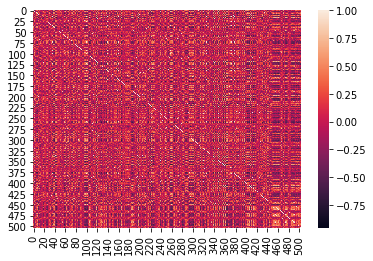

In [64]:
sns.heatmap(corrMatrix, annot=False)
plt.show()

#### Calculating P-value and Fold change

In [65]:
array = []

In [66]:
import math

In [67]:
for i in range(0,503): 
    array.append(abs((math.log2(abs(df_AD[i].mean(axis=0) - df_CONTROL[i].mean(axis=0))))))

In [68]:
len(array)

503

In [69]:
a={}
array2=[]
index=[]

In [70]:
total = 0
for i in range(0,503):
    if(i !=29):
        u_statistic, p_value = stats.mannwhitneyu((list(df_AD[i])), (list(df_CONTROL[i])))
        print(p_value)
        a[i] = p_value
        if(p_value<0.05 and array[i]>1):
            total = total + 1
            array2.append(p_value)
            index.append(i)
        else:
            df_transposed = df_transposed.drop(columns=[i])
            
            
print('Number of miRNAs with p values less than 0.05 is', total)

0.00042522345770294024
0.017595602125370622
8.245444183839766e-05
0.015672486256711853
0.4083450503552476
0.0018750427627908953
0.0023800510610987426
0.004306229177217436
1.387713442237934e-07
0.2349803230404744
0.09336983282356176
0.3168623981940717
0.0025438488631132805
0.06425621958809928
0.010301523968341058
4.1900820230340166e-05
0.14548922906107242
0.21594308963609177
0.10116411486475502
0.4871593166264628
0.27873019111810327
0.01335197093496073
0.15449484569887317
0.07094288857341932
0.4844953543275541
0.014055963708956155
4.1900820230340166e-05
0.00017503483840206174
1.5375882296088356e-05
0.4588917543594388
0.0002240840802727347
0.0009218571196844335
0.25765391458275855
0.02106628427604423
0.21784973541169284
4.1900820230340166e-05
0.00047802722010581455
2.27595695956396e-06
0.00029930796391493324
9.092197265994813e-06
0.15594683394516334
0.0009218571196844335
0.05701472539569142
0.07829324139184367
0.40502613354747524
0.14251019868548254
0.020622789446952863
0.094513812725706

0.0019108579547041722
0.11304782026791671
0.008848023250251458
0.008848023250251458
0.11034441227798997
0.4462158991138456
0.014833770112998997
0.014833770112998997
0.4335269139399195
7.346117198454548e-06
0.1168036235833147
0.0009151248627193419
0.02227893620873291
0.019485001571456616
0.010393963470213355
0.18712896235597676
0.3543971171786515
0.0019108579547041722
0.4380543722341665
4.759494487374627e-05
0.18882992942251564
8.871285157551258e-08
0.15516231430615057
0.08021127124687188
0.016249498378566065
0.010580466337814903
0.24229669982700142
Number of miRNAs with p values less than 0.05 is 228


In [71]:
import statsmodels.api
y = statsmodels.stats.multitest.multipletests(array2, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)

In [72]:
y[1]

array([9.69509484e-04, 2.19223895e-02, 2.32031344e-04, 3.39327970e-03,
       4.11099729e-03, 6.72479625e-03, 4.51998093e-06, 4.32833986e-03,
       1.44984411e-02, 1.42587866e-04, 1.87412849e-02, 1.42587866e-04,
       4.43421591e-04, 7.62108949e-05, 5.49367423e-04, 2.51471875e-02,
       1.42587866e-04, 1.05815734e-03, 2.73114835e-05, 6.89315311e-04,
       6.92604396e-05, 2.48782857e-02, 3.99325191e-02, 3.14473710e-02,
       6.92604396e-05, 1.04044449e-04, 2.42443778e-06, 2.58048757e-06,
       3.39327970e-03, 4.61987243e-02, 2.58317878e-03, 2.70327123e-05,
       1.42587866e-04, 8.27951030e-05, 6.92604396e-05, 1.71418638e-03,
       6.47683719e-04, 7.62108949e-05, 2.43754393e-02, 4.61987243e-02,
       1.32822152e-02, 6.92604396e-05, 3.36463907e-02, 1.42587866e-04,
       1.42587866e-04, 5.02864091e-03, 1.24433805e-03, 4.96306310e-02,
       3.30952190e-02, 3.99325191e-02, 1.60915051e-04, 5.34859483e-06,
       3.14473710e-02, 3.20479172e-05, 6.35521182e-03, 1.32822152e-02,
      

In [73]:
print('miRNAs adjusted by benjamini approach',len(y[1][np.where(y[1]<0.05)]))

miRNAs adjusted by benjamini approach 228


In [74]:
feat_array=np.array(fea)
feat_array

array(['hsa-mir-30a:hsa-miR-30a-3p', 'hsa-mir-550a-1:hsa-miR-550a-3p',
       'hsa-mir-29a:hsa-miR-29a-3p', 'hsa-mir-378e:hsa-miR-378e',
       'hsa-mir-155:hsa-miR-155-5p', 'hsa-mir-628:hsa-miR-628-3p',
       'hsa-mir-26a-2:hsa-miR-26a-5p', 'hsa-mir-106b:hsa-miR-106b-5p',
       'hsa-mir-4781:hsa-miR-4781-3p', 'hsa-mir-204:hsa-miR-204-5p',
       'hsa-mir-194-1:hsa-miR-194-5p', 'hsa-mir-320c-1:hsa-miR-320c',
       'hsa-mir-10b:hsa-miR-10b-5p', 'hsa-mir-1260a:hsa-miR-1260a',
       'hsa-mir-215:hsa-miR-215', 'hsa-mir-548aj-2:hsa-miR-548g-5p',
       'hsa-mir-193a:hsa-miR-193a-5p', 'hsa-mir-4732:hsa-miR-4732-3p',
       'hsa-mir-3613:hsa-miR-3613-3p', 'hsa-mir-1226:hsa-miR-1226-3p',
       'hsa-mir-7-3:hsa-miR-7-5p', 'hsa-mir-1303:hsa-miR-1303',
       'hsa-mir-183:hsa-miR-183-3p', 'hsa-mir-5100:hsa-miR-5100',
       'hsa-mir-196a-1:hsa-miR-196a-5p', 'hsa-mir-181a-1:hsa-miR-181a-3p',
       'hsa-mir-548x:hsa-miR-548ar-5p', 'hsa-mir-548k:hsa-miR-548av-5p',
       'hsa-mir-199a-1:hsa-mi

In [75]:
index

[0,
 1,
 2,
 5,
 6,
 7,
 8,
 12,
 14,
 15,
 25,
 26,
 27,
 28,
 31,
 34,
 36,
 37,
 38,
 39,
 40,
 47,
 49,
 54,
 56,
 58,
 59,
 60,
 62,
 64,
 68,
 69,
 73,
 74,
 75,
 77,
 80,
 85,
 88,
 91,
 92,
 94,
 98,
 100,
 101,
 102,
 104,
 105,
 106,
 108,
 109,
 111,
 112,
 113,
 116,
 117,
 119,
 123,
 124,
 126,
 129,
 132,
 134,
 135,
 138,
 140,
 141,
 142,
 144,
 148,
 153,
 154,
 157,
 158,
 159,
 161,
 164,
 166,
 168,
 171,
 173,
 179,
 183,
 184,
 186,
 187,
 190,
 191,
 194,
 197,
 198,
 199,
 205,
 207,
 212,
 215,
 217,
 219,
 223,
 225,
 227,
 229,
 230,
 231,
 233,
 234,
 240,
 241,
 242,
 246,
 249,
 253,
 255,
 258,
 259,
 260,
 261,
 262,
 263,
 265,
 266,
 274,
 276,
 277,
 278,
 279,
 281,
 282,
 286,
 287,
 289,
 290,
 291,
 293,
 294,
 295,
 297,
 300,
 301,
 302,
 304,
 306,
 308,
 310,
 311,
 313,
 314,
 321,
 322,
 325,
 326,
 327,
 330,
 333,
 335,
 339,
 343,
 347,
 348,
 349,
 351,
 352,
 358,
 359,
 360,
 366,
 368,
 369,
 373,
 376,
 377,
 379,
 381,
 384,
 385,


In [76]:
df_transposed

,0,1,2,5,6,7,8,12,14,15,...,485,487,488,490,493,495,497,500,501,class
AD.1,132.885714,958.457143,78.957143,0.000000,3546.471429,117.857143,21.828571,902.114286,6335.742857,1.100000,...,7.285714,21.828571,12.471429,13.142857,6.385714,2.571429,13.571429,310.414286,7.285714,1.0
AD.2,282.371429,794.542857,64.457143,1.542857,14464.157143,40.428571,35.728571,1840.628571,3969.000000,5.157143,...,13.142857,23.942857,18.285714,16.985714,10.485714,7.414286,18.285714,297.985714,16.371429,1.0
AD.3,179.371429,541.785714,69.814286,2.800000,8648.271429,18.542857,23.057143,1459.242857,2045.757143,2.800000,...,2.800000,19.085714,29.200000,11.400000,5.600000,11.400000,14.871429,275.814286,16.185714,1.0
AD.4,115.700000,1011.342857,65.542857,0.942857,7038.985714,72.342857,31.471429,289.042857,2860.557143,4.714286,...,9.514286,28.257143,3.714286,9.514286,7.185714,13.442857,19.800000,275.814286,14.757143,1.0
AD.5,89.857143,429.757143,32.228571,0.000000,4315.285714,84.800000,27.728571,148.500000,1621.442857,1.357143,...,15.428571,9.514286,37.728571,27.728571,10.600000,15.428571,10.600000,187.242857,6.457143,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AD.43,106.742857,339.700000,48.514286,2.728571,8317.371429,65.542857,25.671429,1621.442857,3969.000000,9.257143,...,1.585714,9.257143,5.114286,1.585714,2.728571,19.614286,13.342857,157.785714,18.914286,1.0
AD.44,117.857143,207.271429,66.700000,3.028571,5995.142857,202.771429,24.185714,771.614286,5080.557143,7.614286,...,6.685714,13.700000,5.042857,0.000000,1.014286,6.242857,4.471429,100.871429,9.642857,1.0
AD.45,175.642857,481.685714,59.871429,3.285714,8317.371429,47.671429,37.728571,1291.942857,3969.000000,3.285714,...,11.885714,20.085714,24.185714,16.514286,13.014286,14.871429,19.085714,250.485714,11.400000,1.0
AD.46,157.785714,349.342857,26.000000,16.514286,8317.371429,33.728571,37.728571,275.814286,1548.071429,0.000000,...,0.000000,5.942857,7.885714,54.371429,10.071429,7.885714,21.828571,297.985714,16.514286,1.0


In [77]:
a

{0: 0.00042522345770294024,
 1: 0.017595602125370622,
 2: 8.245444183839766e-05,
 3: 0.015672486256711853,
 4: 0.4083450503552476,
 5: 0.0018750427627908953,
 6: 0.0023800510610987426,
 7: 0.004306229177217436,
 8: 1.387713442237934e-07,
 9: 0.2349803230404744,
 10: 0.09336983282356176,
 11: 0.3168623981940717,
 12: 0.0025438488631132805,
 13: 0.06425621958809928,
 14: 0.010301523968341058,
 15: 4.1900820230340166e-05,
 16: 0.14548922906107242,
 17: 0.21594308963609177,
 18: 0.10116411486475502,
 19: 0.4871593166264628,
 20: 0.27873019111810327,
 21: 0.01335197093496073,
 22: 0.15449484569887317,
 23: 0.07094288857341932,
 24: 0.4844953543275541,
 25: 0.014055963708956155,
 26: 4.1900820230340166e-05,
 27: 0.00017503483840206174,
 28: 1.5375882296088356e-05,
 30: 0.4588917543594388,
 31: 0.0002240840802727347,
 32: 0.0009218571196844335,
 33: 0.25765391458275855,
 34: 0.02106628427604423,
 35: 0.21784973541169284,
 36: 4.1900820230340166e-05,
 37: 0.00047802722010581455,
 38: 2.2759569

### AUC Analysis

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

In [79]:
df_transposed

,0,1,2,5,6,7,8,12,14,15,...,485,487,488,490,493,495,497,500,501,class
AD.1,132.885714,958.457143,78.957143,0.000000,3546.471429,117.857143,21.828571,902.114286,6335.742857,1.100000,...,7.285714,21.828571,12.471429,13.142857,6.385714,2.571429,13.571429,310.414286,7.285714,1.0
AD.2,282.371429,794.542857,64.457143,1.542857,14464.157143,40.428571,35.728571,1840.628571,3969.000000,5.157143,...,13.142857,23.942857,18.285714,16.985714,10.485714,7.414286,18.285714,297.985714,16.371429,1.0
AD.3,179.371429,541.785714,69.814286,2.800000,8648.271429,18.542857,23.057143,1459.242857,2045.757143,2.800000,...,2.800000,19.085714,29.200000,11.400000,5.600000,11.400000,14.871429,275.814286,16.185714,1.0
AD.4,115.700000,1011.342857,65.542857,0.942857,7038.985714,72.342857,31.471429,289.042857,2860.557143,4.714286,...,9.514286,28.257143,3.714286,9.514286,7.185714,13.442857,19.800000,275.814286,14.757143,1.0
AD.5,89.857143,429.757143,32.228571,0.000000,4315.285714,84.800000,27.728571,148.500000,1621.442857,1.357143,...,15.428571,9.514286,37.728571,27.728571,10.600000,15.428571,10.600000,187.242857,6.457143,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AD.43,106.742857,339.700000,48.514286,2.728571,8317.371429,65.542857,25.671429,1621.442857,3969.000000,9.257143,...,1.585714,9.257143,5.114286,1.585714,2.728571,19.614286,13.342857,157.785714,18.914286,1.0
AD.44,117.857143,207.271429,66.700000,3.028571,5995.142857,202.771429,24.185714,771.614286,5080.557143,7.614286,...,6.685714,13.700000,5.042857,0.000000,1.014286,6.242857,4.471429,100.871429,9.642857,1.0
AD.45,175.642857,481.685714,59.871429,3.285714,8317.371429,47.671429,37.728571,1291.942857,3969.000000,3.285714,...,11.885714,20.085714,24.185714,16.514286,13.014286,14.871429,19.085714,250.485714,11.400000,1.0
AD.46,157.785714,349.342857,26.000000,16.514286,8317.371429,33.728571,37.728571,275.814286,1548.071429,0.000000,...,0.000000,5.942857,7.885714,54.371429,10.071429,7.885714,21.828571,297.985714,16.514286,1.0


In [80]:
X=df_transposed.loc[: , df_transposed.columns != 'class']
Y=df_transposed.loc[: , df_transposed.columns == 'class']

In [81]:
X

,0,1,2,5,6,7,8,12,14,15,...,479,485,487,488,490,493,495,497,500,501
AD.1,132.885714,958.457143,78.957143,0.000000,3546.471429,117.857143,21.828571,902.114286,6335.742857,1.100000,...,6.385714,7.285714,21.828571,12.471429,13.142857,6.385714,2.571429,13.571429,310.414286,7.285714
AD.2,282.371429,794.542857,64.457143,1.542857,14464.157143,40.428571,35.728571,1840.628571,3969.000000,5.157143,...,2.671429,13.142857,23.942857,18.285714,16.985714,10.485714,7.414286,18.285714,297.985714,16.371429
AD.3,179.371429,541.785714,69.814286,2.800000,8648.271429,18.542857,23.057143,1459.242857,2045.757143,2.800000,...,6.942857,2.800000,19.085714,29.200000,11.400000,5.600000,11.400000,14.871429,275.814286,16.185714
AD.4,115.700000,1011.342857,65.542857,0.942857,7038.985714,72.342857,31.471429,289.042857,2860.557143,4.714286,...,4.714286,9.514286,28.257143,3.714286,9.514286,7.185714,13.442857,19.800000,275.814286,14.757143
AD.5,89.857143,429.757143,32.228571,0.000000,4315.285714,84.800000,27.728571,148.500000,1621.442857,1.357143,...,1.357143,15.428571,9.514286,37.728571,27.728571,10.600000,15.428571,10.600000,187.242857,6.457143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AD.43,106.742857,339.700000,48.514286,2.728571,8317.371429,65.542857,25.671429,1621.442857,3969.000000,9.257143,...,0.000000,1.585714,9.257143,5.114286,1.585714,2.728571,19.614286,13.342857,157.785714,18.914286
AD.44,117.857143,207.271429,66.700000,3.028571,5995.142857,202.771429,24.185714,771.614286,5080.557143,7.614286,...,1.785714,6.685714,13.700000,5.042857,0.000000,1.014286,6.242857,4.471429,100.871429,9.642857
AD.45,175.642857,481.685714,59.871429,3.285714,8317.371429,47.671429,37.728571,1291.942857,3969.000000,3.285714,...,2.442857,11.885714,20.085714,24.185714,16.514286,13.014286,14.871429,19.085714,250.485714,11.400000
AD.46,157.785714,349.342857,26.000000,16.514286,8317.371429,33.728571,37.728571,275.814286,1548.071429,0.000000,...,10.071429,0.000000,5.942857,7.885714,54.371429,10.071429,7.885714,21.828571,297.985714,16.514286


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [83]:
X_train.shape

(55, 229)

In [84]:
y_train.iloc[0:55,:]

,class
AD.28,1.0
AD.40,1.0
control.18,0.0
control.19,0.0
control.13,0.0
control.11,0.0
control,0.0
AD.22,1.0
AD.37,1.0
AD.4,1.0


In [85]:
count=[]
val=[]
roc_auc= []
down_array=[]
up_array=[]
for i in X_train.columns :
    #Calculate the AUC score using Random Forest Classfier
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train[i].to_frame(), y_train.values.ravel())
    pred_prob = clf.predict(X_test[i].to_frame())
    auc_score = roc_auc_score(y_test, pred_prob)
    roc_auc.append(auc_score)
    #Selecting the down regulated miRNAs
    if auc_score>0.5:
        down_array.append(i)
        val.append(auc_score)
        count.append(i)
    #Selecting the up regulated miRNAs
    if auc_score<0.5:
        up_array.append(i)
        val.append(auc_score)
        count.append(i)

In [86]:
print(len(roc_auc))

229


In [87]:
print('No of downregulated miRNAs:',len(down_array))

No of downregulated miRNAs: 179


In [88]:
print('No of upregulated miRNAs:',len(up_array))

No of upregulated miRNAs: 40


In [89]:
result_down=[]
for i in down_array:
    result_down.append(feat_array[i])

In [90]:
print('Down regulated miRNAs:',result_down)

Down regulated miRNAs: ['hsa-mir-30a:hsa-miR-30a-3p', 'hsa-mir-29a:hsa-miR-29a-3p', 'hsa-mir-26a-2:hsa-miR-26a-5p', 'hsa-mir-4781:hsa-miR-4781-3p', 'hsa-mir-10b:hsa-miR-10b-5p', 'hsa-mir-215:hsa-miR-215', 'hsa-mir-548aj-2:hsa-miR-548g-5p', 'hsa-mir-548x:hsa-miR-548ar-5p', 'hsa-mir-548k:hsa-miR-548av-5p', 'hsa-mir-199a-1:hsa-miR-199a-3p', 'hsa-mir-30e:hsa-miR-30e-3p', 'hsa-mir-4508:hsa-miR-4508', 'hsa-mir-548aj-2:hsa-miR-548x-5p', 'hsa-mir-5001:hsa-miR-5001-3p', 'hsa-mir-16-2:hsa-miR-16-2-3p', 'hsa-mir-128-2:hsa-miR-128', 'hsa-mir-486:hsa-miR-486-3p', 'hsa-mir-550a-1:hsa-miR-550a-5p', 'hsa-mir-199a-2:hsa-miR-199b-3p', 'hsa-mir-144:hsa-miR-144-5p', 'hsa-let-7f-2:hsa-let-7f-5p', 'hsa-mir-126:hsa-miR-126-5p', 'hsa-mir-10a:hsa-miR-10a-5p', 'hsa-mir-98:hsa-miR-98', 'hsa-mir-548x:hsa-miR-548x-5p', 'hsa-mir-363:hsa-miR-363-3p', 'hsa-mir-548h-1:hsa-miR-548h-5p', 'hsa-mir-223:hsa-miR-223-3p', 'hsa-mir-5690:hsa-miR-5690', 'hsa-mir-199b:hsa-miR-199b-3p', 'hsa-mir-548h-5:hsa-miR-548h-5p', 'hsa-mir-

In [91]:
result_up=[]
for i in up_array:
    result_up.append(feat_array[i])

In [92]:
print('Up regulated miRNAs:',result_up)

Up regulated miRNAs: ['hsa-mir-550a-1:hsa-miR-550a-3p', 'hsa-mir-628:hsa-miR-628-3p', 'hsa-mir-106b:hsa-miR-106b-5p', 'hsa-mir-181a-1:hsa-miR-181a-3p', 'hsa-mir-371b:hsa-miR-371b-5p', 'hsa-mir-4482-1:hsa-miR-4482-3p', 'hsa-mir-191:hsa-miR-191-3p', 'hsa-mir-3200:hsa-miR-3200-3p', 'hsa-mir-424:hsa-miR-424-3p', 'hsa-mir-644b:hsa-miR-644b-3p', 'hsa-mir-21:hsa-miR-21-5p', 'hsa-mir-937:hsa-miR-937', 'hsa-mir-3074:hsa-miR-3074-5p', 'hsa-mir-19a:hsa-miR-19a-3p', 'hsa-mir-4482-2:hsa-miR-4482-3p', 'hsa-mir-659:hsa-miR-659-5p', 'hsa-mir-3614:hsa-miR-3614-5p', 'hsa-mir-335:hsa-miR-335-3p', 'hsa-mir-625:hsa-miR-625-5p', 'hsa-mir-550a-2:hsa-miR-550a-3p', 'hsa-let-7b:hsa-let-7b-3p', 'hsa-mir-151b:hsa-miR-151b', 'hsa-mir-550a-3:hsa-miR-550a-3p', 'hsa-mir-199a-1:hsa-miR-199a-5p', 'hsa-mir-4435-1:hsa-miR-4435', 'hsa-mir-151a:hsa-miR-151b', 'hsa-mir-1260b:hsa-miR-1260b', 'hsa-mir-199a-2:hsa-miR-199a-5p', 'hsa-mir-589:hsa-miR-589-5p', 'hsa-let-7i:hsa-let-7i-5p', 'hsa-mir-1234:hsa-miR-1234', 'hsa-mir-125a:

In [93]:
auc_val_array=np.array(val)
auc_val_array

array([0.54166667, 0.3125    , 0.66666667, 0.45833333, 0.6875    ,
       0.39583333, 0.625     , 0.54166667, 0.6875    , 0.60416667,
       0.25      , 0.60416667, 0.6875    , 0.79166667, 0.625     ,
       0.6875    , 0.60416667, 0.39583333, 0.52083333, 0.54166667,
       0.66666667, 0.54166667, 0.35416667, 0.8125    , 0.85416667,
       0.79166667, 0.58333333, 0.625     , 0.25      , 0.60416667,
       0.66666667, 0.60416667, 0.5625    , 0.54166667, 0.6875    ,
       0.6875    , 0.79166667, 0.375     , 0.47916667, 0.47916667,
       0.5625    , 0.5625    , 0.60416667, 0.60416667, 0.45833333,
       0.625     , 0.5625    , 0.45833333, 0.54166667, 0.625     ,
       0.58333333, 0.66666667, 0.52083333, 0.6875    , 0.5625    ,
       0.60416667, 0.72916667, 0.75      , 0.60416667, 0.85416667,
       0.8125    , 0.60416667, 0.60416667, 0.60416667, 0.625     ,
       0.3125    , 0.66666667, 0.45833333, 0.79166667, 0.66666667,
       0.54166667, 0.66666667, 0.60416667, 0.54166667, 0.60416

In [98]:
#Keep column numbers of selected miRNAs from AUC
count_array=np.array(count)

In [99]:
count_array

array([  0,   1,   2,   5,   6,   7,   8,  12,  14,  15,  25,  26,  27,
        28,  31,  34,  36,  37,  38,  39,  40,  47,  49,  56,  58,  59,
        60,  62,  64,  68,  69,  73,  74,  75,  77,  80,  85,  88,  91,
        92,  94,  98, 100, 101, 102, 104, 105, 106, 108, 109, 111, 113,
       116, 117, 123, 124, 126, 129, 132, 134, 135, 138, 140, 141, 142,
       144, 148, 153, 154, 157, 158, 159, 161, 164, 166, 168, 171, 173,
       179, 183, 184, 186, 187, 190, 194, 197, 198, 199, 205, 212, 215,
       217, 219, 225, 227, 229, 230, 231, 233, 234, 240, 241, 242, 246,
       249, 253, 255, 258, 259, 260, 261, 262, 265, 266, 274, 276, 277,
       278, 281, 282, 286, 287, 289, 290, 291, 293, 294, 295, 297, 300,
       301, 302, 304, 306, 308, 310, 311, 313, 314, 321, 322, 325, 326,
       327, 330, 333, 335, 339, 343, 347, 348, 349, 351, 352, 358, 359,
       360, 366, 368, 369, 373, 376, 377, 379, 381, 384, 385, 387, 389,
       391, 394, 395, 396, 397, 398, 402, 403, 405, 407, 408, 41

In [100]:
#Selected miRNAs using AUC
result_auc=[]
for i in count_array:
    result_auc.append(feat_array[i])

In [101]:
print('Selected miRNAs using AUC analysys:',result_auc)

Selected miRNAs using AUC analysys: ['hsa-mir-30a:hsa-miR-30a-3p', 'hsa-mir-550a-1:hsa-miR-550a-3p', 'hsa-mir-29a:hsa-miR-29a-3p', 'hsa-mir-628:hsa-miR-628-3p', 'hsa-mir-26a-2:hsa-miR-26a-5p', 'hsa-mir-106b:hsa-miR-106b-5p', 'hsa-mir-4781:hsa-miR-4781-3p', 'hsa-mir-10b:hsa-miR-10b-5p', 'hsa-mir-215:hsa-miR-215', 'hsa-mir-548aj-2:hsa-miR-548g-5p', 'hsa-mir-181a-1:hsa-miR-181a-3p', 'hsa-mir-548x:hsa-miR-548ar-5p', 'hsa-mir-548k:hsa-miR-548av-5p', 'hsa-mir-199a-1:hsa-miR-199a-3p', 'hsa-mir-30e:hsa-miR-30e-3p', 'hsa-mir-4508:hsa-miR-4508', 'hsa-mir-548aj-2:hsa-miR-548x-5p', 'hsa-mir-371b:hsa-miR-371b-5p', 'hsa-mir-5001:hsa-miR-5001-3p', 'hsa-mir-16-2:hsa-miR-16-2-3p', 'hsa-mir-128-2:hsa-miR-128', 'hsa-mir-486:hsa-miR-486-3p', 'hsa-mir-4482-1:hsa-miR-4482-3p', 'hsa-mir-550a-1:hsa-miR-550a-5p', 'hsa-mir-199a-2:hsa-miR-199b-3p', 'hsa-mir-144:hsa-miR-144-5p', 'hsa-let-7f-2:hsa-let-7f-5p', 'hsa-mir-126:hsa-miR-126-5p', 'hsa-mir-191:hsa-miR-191-3p', 'hsa-mir-10a:hsa-miR-10a-5p', 'hsa-mir-98:hsa-

In [103]:
#AUC values
auc_array=np.array(roc_auc)

In [104]:
auc_array

array([0.54166667, 0.3125    , 0.66666667, 0.45833333, 0.6875    ,
       0.39583333, 0.625     , 0.54166667, 0.6875    , 0.60416667,
       0.25      , 0.60416667, 0.6875    , 0.79166667, 0.5       ,
       0.625     , 0.6875    , 0.60416667, 0.39583333, 0.52083333,
       0.54166667, 0.66666667, 0.54166667, 0.35416667, 0.5       ,
       0.8125    , 0.85416667, 0.79166667, 0.58333333, 0.625     ,
       0.25      , 0.60416667, 0.66666667, 0.60416667, 0.5625    ,
       0.54166667, 0.6875    , 0.6875    , 0.79166667, 0.375     ,
       0.47916667, 0.47916667, 0.5625    , 0.5625    , 0.60416667,
       0.60416667, 0.45833333, 0.625     , 0.5625    , 0.45833333,
       0.54166667, 0.625     , 0.58333333, 0.5       , 0.66666667,
       0.52083333, 0.6875    , 0.5       , 0.5625    , 0.60416667,
       0.72916667, 0.75      , 0.60416667, 0.85416667, 0.8125    ,
       0.60416667, 0.60416667, 0.60416667, 0.625     , 0.3125    ,
       0.66666667, 0.45833333, 0.79166667, 0.66666667, 0.54166

In [105]:
len(auc_array)

229

In [106]:
len(result_auc)

219

In [107]:
most_down_regulated=auc_array.max()
print('Most down regulated miRNAs AUC:',most_down_regulated)

Most down regulated miRNAs AUC: 0.875


In [108]:
most_up_regulated=auc_array.min()
print('Most up regulated miRNAs AUC:',most_up_regulated)

Most up regulated miRNAs AUC: 0.25


In [111]:
for i in range(0,len(auc_array)):
    if auc_array[i]==most_down_regulated :
        print(i)
        #initial index of the miRNA
        print(count[i])
        print('Most down regulated miRNA:-',feat_array[count[i]])

149
347
Most down regulated miRNA:- hsa-mir-361:hsa-miR-361-5p


In [112]:
for i in range(0,len(auc_array)):
    if auc_array[i]==most_up_regulated :
        print(i)
        #initial index of the miRNA
        print(count[i])
        print('Most up regulated miRNA:-',feat_array[count[i]])

10
25
Most up regulated miRNA:- hsa-mir-181a-1:hsa-miR-181a-3p
30
69
Most up regulated miRNA:- hsa-mir-98:hsa-miR-98


#### Histograms For Most Down regulated and Most Up regulated miRNAs

In [115]:
#Defines a function to generate a histogram
def generate_distribution_histogram(dataframe, 
                                    column_name, 
                                    title, x_axis_label, y_axis_label,
                                    label_name,
                                    number_bins = 15):
    plt.hist(dataframe[column_name], bins = number_bins, label = label_name)
    plt.title(title)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.legend(loc='upper right')
    

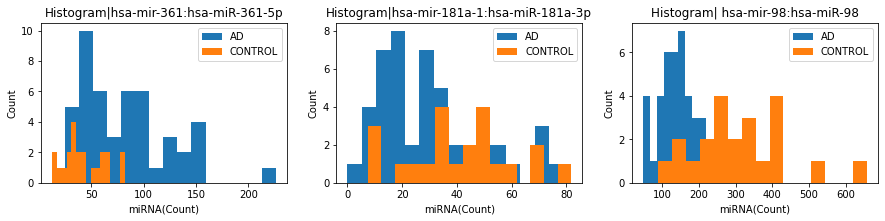

In [118]:
plt.figure(figsize=(15,10))

#Histogram for most down regulated miRNA
plt.subplot(331)
generate_distribution_histogram(df_AD, 347,
                                title = 'Histogram|hsa-mir-361:hsa-miR-361-5p',
                                x_axis_label = 'miRNA(Count)',
                                y_axis_label = 'Count',
                                label_name = 'AD')

generate_distribution_histogram(df_CONTROL, 347,
                                title = 'Histogram|hsa-mir-361:hsa-miR-361-5p',
                                x_axis_label = 'miRNA(Count)',
                                y_axis_label = 'Count',
                                label_name = 'CONTROL')


#Histograms for most up regulated miRNAs
plt.subplot(332)
generate_distribution_histogram(df_AD, 25,
                                title = 'Histogram|hsa-mir-181a-1:hsa-miR-181a-3p',
                                x_axis_label = 'miRNA(Count)',
                                y_axis_label = 'Count',
                                label_name = 'AD')

generate_distribution_histogram(df_CONTROL, 25,
                                title = 'Histogram|hsa-mir-181a-1:hsa-miR-181a-3p',
                                x_axis_label = 'miRNA(Count)',
                                y_axis_label = 'Count',
                                label_name = 'CONTROL')


plt.subplot(333)
generate_distribution_histogram(df_AD, 69,
                                title = 'Histogram| hsa-mir-98:hsa-miR-98',
                                x_axis_label = 'miRNA(Count)',
                                y_axis_label = 'Count',
                                label_name = 'AD')

generate_distribution_histogram(df_CONTROL, 69,
                                title = 'Histogram| hsa-mir-98:hsa-miR-98',
                                x_axis_label = 'miRNA(Count)',
                                y_axis_label = 'Count',
                                label_name = 'CONTROL')


plt.savefig('Histogram')
plt.show()

In [119]:
roc_values = pd.Series(roc_auc)
roc_values.index = X_train.columns
roc_values.sort_values(ascending =False, inplace = True)

In [120]:
roc_values

322    0.875000
391    0.854167
414    0.854167
58     0.854167
134    0.854167
         ...   
282    0.312500
1      0.312500
278    0.291667
25     0.250000
64     0.250000
Length: 229, dtype: float64

<AxesSubplot:>

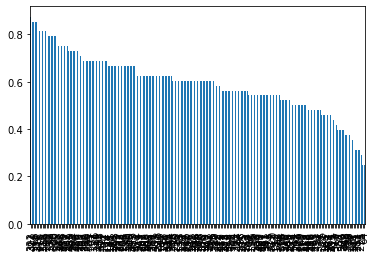

In [122]:
#Visualizing the roc values in ascending order
roc_values.plot.bar()

In [123]:
df_new=df_transposed.loc[:,[index for index in count_array]]
df_new

,0,1,2,5,6,7,8,12,14,15,...,479,485,487,488,490,493,495,497,500,501
AD.1,132.885714,958.457143,78.957143,0.000000,3546.471429,117.857143,21.828571,902.114286,6335.742857,1.100000,...,6.385714,7.285714,21.828571,12.471429,13.142857,6.385714,2.571429,13.571429,310.414286,7.285714
AD.2,282.371429,794.542857,64.457143,1.542857,14464.157143,40.428571,35.728571,1840.628571,3969.000000,5.157143,...,2.671429,13.142857,23.942857,18.285714,16.985714,10.485714,7.414286,18.285714,297.985714,16.371429
AD.3,179.371429,541.785714,69.814286,2.800000,8648.271429,18.542857,23.057143,1459.242857,2045.757143,2.800000,...,6.942857,2.800000,19.085714,29.200000,11.400000,5.600000,11.400000,14.871429,275.814286,16.185714
AD.4,115.700000,1011.342857,65.542857,0.942857,7038.985714,72.342857,31.471429,289.042857,2860.557143,4.714286,...,4.714286,9.514286,28.257143,3.714286,9.514286,7.185714,13.442857,19.800000,275.814286,14.757143
AD.5,89.857143,429.757143,32.228571,0.000000,4315.285714,84.800000,27.728571,148.500000,1621.442857,1.357143,...,1.357143,15.428571,9.514286,37.728571,27.728571,10.600000,15.428571,10.600000,187.242857,6.457143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AD.43,106.742857,339.700000,48.514286,2.728571,8317.371429,65.542857,25.671429,1621.442857,3969.000000,9.257143,...,0.000000,1.585714,9.257143,5.114286,1.585714,2.728571,19.614286,13.342857,157.785714,18.914286
AD.44,117.857143,207.271429,66.700000,3.028571,5995.142857,202.771429,24.185714,771.614286,5080.557143,7.614286,...,1.785714,6.685714,13.700000,5.042857,0.000000,1.014286,6.242857,4.471429,100.871429,9.642857
AD.45,175.642857,481.685714,59.871429,3.285714,8317.371429,47.671429,37.728571,1291.942857,3969.000000,3.285714,...,2.442857,11.885714,20.085714,24.185714,16.514286,13.014286,14.871429,19.085714,250.485714,11.400000
AD.46,157.785714,349.342857,26.000000,16.514286,8317.371429,33.728571,37.728571,275.814286,1548.071429,0.000000,...,10.071429,0.000000,5.942857,7.885714,54.371429,10.071429,7.885714,21.828571,297.985714,16.514286


In [124]:
for i in count_array:
    df_new = df_new.rename(columns={i:feat_array[i]})

In [125]:
df_new

,hsa-mir-30a:hsa-miR-30a-3p,hsa-mir-550a-1:hsa-miR-550a-3p,hsa-mir-29a:hsa-miR-29a-3p,hsa-mir-628:hsa-miR-628-3p,hsa-mir-26a-2:hsa-miR-26a-5p,hsa-mir-106b:hsa-miR-106b-5p,hsa-mir-4781:hsa-miR-4781-3p,hsa-mir-10b:hsa-miR-10b-5p,hsa-mir-215:hsa-miR-215,hsa-mir-548aj-2:hsa-miR-548g-5p,...,brain-mir-413:brain-mir-413,brain-mir-431:brain-mir-431,brain-mir-23:brain-mir-23,brain-mir-427:brain-mir-427,brain-mir-392:brain-mir-392,brain-mir-192:brain-mir-192,brain-mir-53:brain-mir-53,brain-mir-112:brain-mir-112,brain-mir-159:brain-mir-159,brain-mir-328:brain-mir-328
AD.1,132.885714,958.457143,78.957143,0.000000,3546.471429,117.857143,21.828571,902.114286,6335.742857,1.100000,...,6.385714,7.285714,21.828571,12.471429,13.142857,6.385714,2.571429,13.571429,310.414286,7.285714
AD.2,282.371429,794.542857,64.457143,1.542857,14464.157143,40.428571,35.728571,1840.628571,3969.000000,5.157143,...,2.671429,13.142857,23.942857,18.285714,16.985714,10.485714,7.414286,18.285714,297.985714,16.371429
AD.3,179.371429,541.785714,69.814286,2.800000,8648.271429,18.542857,23.057143,1459.242857,2045.757143,2.800000,...,6.942857,2.800000,19.085714,29.200000,11.400000,5.600000,11.400000,14.871429,275.814286,16.185714
AD.4,115.700000,1011.342857,65.542857,0.942857,7038.985714,72.342857,31.471429,289.042857,2860.557143,4.714286,...,4.714286,9.514286,28.257143,3.714286,9.514286,7.185714,13.442857,19.800000,275.814286,14.757143
AD.5,89.857143,429.757143,32.228571,0.000000,4315.285714,84.800000,27.728571,148.500000,1621.442857,1.357143,...,1.357143,15.428571,9.514286,37.728571,27.728571,10.600000,15.428571,10.600000,187.242857,6.457143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AD.43,106.742857,339.700000,48.514286,2.728571,8317.371429,65.542857,25.671429,1621.442857,3969.000000,9.257143,...,0.000000,1.585714,9.257143,5.114286,1.585714,2.728571,19.614286,13.342857,157.785714,18.914286
AD.44,117.857143,207.271429,66.700000,3.028571,5995.142857,202.771429,24.185714,771.614286,5080.557143,7.614286,...,1.785714,6.685714,13.700000,5.042857,0.000000,1.014286,6.242857,4.471429,100.871429,9.642857
AD.45,175.642857,481.685714,59.871429,3.285714,8317.371429,47.671429,37.728571,1291.942857,3969.000000,3.285714,...,2.442857,11.885714,20.085714,24.185714,16.514286,13.014286,14.871429,19.085714,250.485714,11.400000
AD.46,157.785714,349.342857,26.000000,16.514286,8317.371429,33.728571,37.728571,275.814286,1548.071429,0.000000,...,10.071429,0.000000,5.942857,7.885714,54.371429,10.071429,7.885714,21.828571,297.985714,16.514286


In [126]:
df_new_class=pd.concat([df_new,df_transposed['class']],axis=1)

In [127]:
df_new_class

,hsa-mir-30a:hsa-miR-30a-3p,hsa-mir-550a-1:hsa-miR-550a-3p,hsa-mir-29a:hsa-miR-29a-3p,hsa-mir-628:hsa-miR-628-3p,hsa-mir-26a-2:hsa-miR-26a-5p,hsa-mir-106b:hsa-miR-106b-5p,hsa-mir-4781:hsa-miR-4781-3p,hsa-mir-10b:hsa-miR-10b-5p,hsa-mir-215:hsa-miR-215,hsa-mir-548aj-2:hsa-miR-548g-5p,...,brain-mir-431:brain-mir-431,brain-mir-23:brain-mir-23,brain-mir-427:brain-mir-427,brain-mir-392:brain-mir-392,brain-mir-192:brain-mir-192,brain-mir-53:brain-mir-53,brain-mir-112:brain-mir-112,brain-mir-159:brain-mir-159,brain-mir-328:brain-mir-328,class
AD.1,132.885714,958.457143,78.957143,0.000000,3546.471429,117.857143,21.828571,902.114286,6335.742857,1.100000,...,7.285714,21.828571,12.471429,13.142857,6.385714,2.571429,13.571429,310.414286,7.285714,1.0
AD.2,282.371429,794.542857,64.457143,1.542857,14464.157143,40.428571,35.728571,1840.628571,3969.000000,5.157143,...,13.142857,23.942857,18.285714,16.985714,10.485714,7.414286,18.285714,297.985714,16.371429,1.0
AD.3,179.371429,541.785714,69.814286,2.800000,8648.271429,18.542857,23.057143,1459.242857,2045.757143,2.800000,...,2.800000,19.085714,29.200000,11.400000,5.600000,11.400000,14.871429,275.814286,16.185714,1.0
AD.4,115.700000,1011.342857,65.542857,0.942857,7038.985714,72.342857,31.471429,289.042857,2860.557143,4.714286,...,9.514286,28.257143,3.714286,9.514286,7.185714,13.442857,19.800000,275.814286,14.757143,1.0
AD.5,89.857143,429.757143,32.228571,0.000000,4315.285714,84.800000,27.728571,148.500000,1621.442857,1.357143,...,15.428571,9.514286,37.728571,27.728571,10.600000,15.428571,10.600000,187.242857,6.457143,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AD.43,106.742857,339.700000,48.514286,2.728571,8317.371429,65.542857,25.671429,1621.442857,3969.000000,9.257143,...,1.585714,9.257143,5.114286,1.585714,2.728571,19.614286,13.342857,157.785714,18.914286,1.0
AD.44,117.857143,207.271429,66.700000,3.028571,5995.142857,202.771429,24.185714,771.614286,5080.557143,7.614286,...,6.685714,13.700000,5.042857,0.000000,1.014286,6.242857,4.471429,100.871429,9.642857,1.0
AD.45,175.642857,481.685714,59.871429,3.285714,8317.371429,47.671429,37.728571,1291.942857,3969.000000,3.285714,...,11.885714,20.085714,24.185714,16.514286,13.014286,14.871429,19.085714,250.485714,11.400000,1.0
AD.46,157.785714,349.342857,26.000000,16.514286,8317.371429,33.728571,37.728571,275.814286,1548.071429,0.000000,...,0.000000,5.942857,7.885714,54.371429,10.071429,7.885714,21.828571,297.985714,16.514286,1.0


In [128]:
import xlwt

In [129]:
df_new_class.to_excel("df_new.xls")

In [130]:
X=df_new_class.loc[: , df_new_class.columns != 'class']
X

,hsa-mir-30a:hsa-miR-30a-3p,hsa-mir-550a-1:hsa-miR-550a-3p,hsa-mir-29a:hsa-miR-29a-3p,hsa-mir-628:hsa-miR-628-3p,hsa-mir-26a-2:hsa-miR-26a-5p,hsa-mir-106b:hsa-miR-106b-5p,hsa-mir-4781:hsa-miR-4781-3p,hsa-mir-10b:hsa-miR-10b-5p,hsa-mir-215:hsa-miR-215,hsa-mir-548aj-2:hsa-miR-548g-5p,...,brain-mir-413:brain-mir-413,brain-mir-431:brain-mir-431,brain-mir-23:brain-mir-23,brain-mir-427:brain-mir-427,brain-mir-392:brain-mir-392,brain-mir-192:brain-mir-192,brain-mir-53:brain-mir-53,brain-mir-112:brain-mir-112,brain-mir-159:brain-mir-159,brain-mir-328:brain-mir-328
AD.1,132.885714,958.457143,78.957143,0.000000,3546.471429,117.857143,21.828571,902.114286,6335.742857,1.100000,...,6.385714,7.285714,21.828571,12.471429,13.142857,6.385714,2.571429,13.571429,310.414286,7.285714
AD.2,282.371429,794.542857,64.457143,1.542857,14464.157143,40.428571,35.728571,1840.628571,3969.000000,5.157143,...,2.671429,13.142857,23.942857,18.285714,16.985714,10.485714,7.414286,18.285714,297.985714,16.371429
AD.3,179.371429,541.785714,69.814286,2.800000,8648.271429,18.542857,23.057143,1459.242857,2045.757143,2.800000,...,6.942857,2.800000,19.085714,29.200000,11.400000,5.600000,11.400000,14.871429,275.814286,16.185714
AD.4,115.700000,1011.342857,65.542857,0.942857,7038.985714,72.342857,31.471429,289.042857,2860.557143,4.714286,...,4.714286,9.514286,28.257143,3.714286,9.514286,7.185714,13.442857,19.800000,275.814286,14.757143
AD.5,89.857143,429.757143,32.228571,0.000000,4315.285714,84.800000,27.728571,148.500000,1621.442857,1.357143,...,1.357143,15.428571,9.514286,37.728571,27.728571,10.600000,15.428571,10.600000,187.242857,6.457143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AD.43,106.742857,339.700000,48.514286,2.728571,8317.371429,65.542857,25.671429,1621.442857,3969.000000,9.257143,...,0.000000,1.585714,9.257143,5.114286,1.585714,2.728571,19.614286,13.342857,157.785714,18.914286
AD.44,117.857143,207.271429,66.700000,3.028571,5995.142857,202.771429,24.185714,771.614286,5080.557143,7.614286,...,1.785714,6.685714,13.700000,5.042857,0.000000,1.014286,6.242857,4.471429,100.871429,9.642857
AD.45,175.642857,481.685714,59.871429,3.285714,8317.371429,47.671429,37.728571,1291.942857,3969.000000,3.285714,...,2.442857,11.885714,20.085714,24.185714,16.514286,13.014286,14.871429,19.085714,250.485714,11.400000
AD.46,157.785714,349.342857,26.000000,16.514286,8317.371429,33.728571,37.728571,275.814286,1548.071429,0.000000,...,10.071429,0.000000,5.942857,7.885714,54.371429,10.071429,7.885714,21.828571,297.985714,16.514286


In [131]:
Y=df_new_class.loc[: , df_new_class.columns == 'class']
Y

,class
AD.1,1.0
AD.2,1.0
AD.3,1.0
AD.4,1.0
AD.5,1.0
...,...
AD.43,1.0
AD.44,1.0
AD.45,1.0
AD.46,1.0
